<a href="https://colab.research.google.com/github/chohyungrae/Machine-Learning-Deep-Learning-Code-Learning/blob/master/Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

구글콜렙에서 열기:

https://colab.research.google.com/github/chohyungrae/Machine-Learning-Deep-Learning-Code-Learning/blob/master/Softmax.ipynb

참조사이트: https://yamalab.tistory.com/87

softmax함수 수식
![대체 텍스트](https://miro.medium.com/max/1400/0*tGSrq3hfKFBgKntB)
일반적인 Neural Network의 activation function의 차이점 


*   일반적:유닛 k의 출력 Zk는 입력 Uk로부터만 결정되는 것
*   소프트맥수 함수;유닛 k의 출력 Zk는 Sum(Uk)로 결정된다.
---
시그모이드 함수는 로지스틱 함수의 한 케이스라 볼 수 있는데
인풋의 개수에 따라 

- input값이 하나밖에 없다면? sigmoid함수(logic함수)
- input값이 여러개면? softmax함수



![대체 텍스트](https://miro.medium.com/max/1000/0*pK080h7eb0348DBm)
j는 1부터 K까지의 범위를 가지고, 

z는 K차원 벡터

예) 작은 숫자, 3과 5가 있다.

숫자가 두 개이기 때문에, K는 2가 되고, z는 2차원벡터, 

K=[3, 5]가 된다.

=> somftmax식에 대입함으로써, 두 숫자를 확률처럼 만들 수 있다.

![대체 텍스트](https://t1.daumcdn.net/cfile/tistory/9919053B5B41E19529)


*   Softmax는 정답 클래스를 one-hot encoding의 방법으로 학습시킨다.
*   숫자(0.7, 0.2, 0.1)이 softmax를 통과하면 정답 데이터인 L은 확률값으로 바뀐다. 



In [13]:
import numpy as np


'''

- GD를 이용하여 Softmax regression 학습
- 참고 : https://deepnotes.io/softmax-crossentropy

'''

class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, threshold=0.01, max_iterations=100000, verbose=False, reg_strength=1e-5):
        self._learning_rate = learning_rate  # 학습 계수
        self._max_iterations = max_iterations  # 반복 횟수
        self._threshold = threshold  # 학습 중단 계수
        self._verbose = verbose  # 중간 진행사항 출력 여부
        self._reg_strength = reg_strength # 정규화 파라미터 계수

    # theta(W) 계수들 return
    def get_coeff(self):
        return self._W

    # softmax function
    def softmax_func(self, x_data):
        predictions = x_data - (x_data.max(axis=1).reshape([-1, 1]))
        softmax = np.exp(predictions)
        softmax /= softmax.sum(axis=1).reshape([-1, 1])
        return softmax

        # prediction result example
        # [[0.01821127 0.24519181 0.73659691]
        # [0.87279747 0.0791784  0.04802413]
        # [0.05280815 0.86841135 0.0787805 ]]

    # cost function 정의
    def cost_func(self, softmax, y_data):
        sample_size = y_data.shape[0]

        # softmax[np.arange(len(softmax)), np.argmax(y_data, axis=1)]
        # --> 해당 one-hot 의 class index * 해당 유닛의 출력을 각 row(1개의 input row)에 대해 계산
        # --> (n, 1) 의 shape
        cost = -np.log(softmax[np.arange(len(softmax)), np.argmax(y_data, axis=1)]).sum() 
        cost /= sample_size
        cost += (self._reg_strength * (self._W**2).sum()) / 2
        return cost

    # gradient 계산 (regularized)
    def gradient_func(self, softmax, x_data, y_data):
        sample_size = y.shape[0]

        # softmax cost function의 미분 결과는 pi−yi 이므로,
        # softmax가 계산된 matrix에서, (해당 one-hot 의 class index * 해당 유닛)에 해당하는 유닛 위치에 -1을 더해줌.
        softmax[np.arange(len(softmax)), np.argmax(y_data, axis=1)] -= 1
        gradient = np.dot(x_data.transpose(), softmax) / sample_size
        gradient += self._reg_strength * self._W
        return gradient

    # learning
    def fit(self, x_data, y_data):
        num_examples, num_features = np.shape(x_data)
        num_classes = y.shape[1]

        # 가중계수 초기화
        self._W = np.random.randn(num_features, num_classes) / np.sqrt(num_features / 2)

        for i in range(self._max_iterations):
            
            # y^ 계산
            z = np.dot(x_data, self._W)
            softmax = self.softmax_func(z)

            # cost 함수
            cost = self.cost_func(softmax, y_data)

            # softmax 함수의 gradient (regularized)
            gradient = self.gradient_func(softmax, x_data, y_data)

            # gradient에 따라 theta 업데이트
            self._W -= self._learning_rate * gradient

            # 판정 임계값에 다다르면 학습 중단
            if cost < self._threshold:
                return False

            # 100 iter 마다 cost 출력
            if (self._verbose == True and i % 100 == 0):
                print ("Iter(Epoch): %s, Loss: %s" % (i, cost))

    # prediction
    def predict(self, x_data):
        return np.argmax(x_data.dot(self._W), 1)

## **동물의 특징에 따라 7가지로 분류 예제**
참조사이트:https://www.youtube.com/watch?v=E-io76NlsqA          
https://leechanho.tistory.com/23



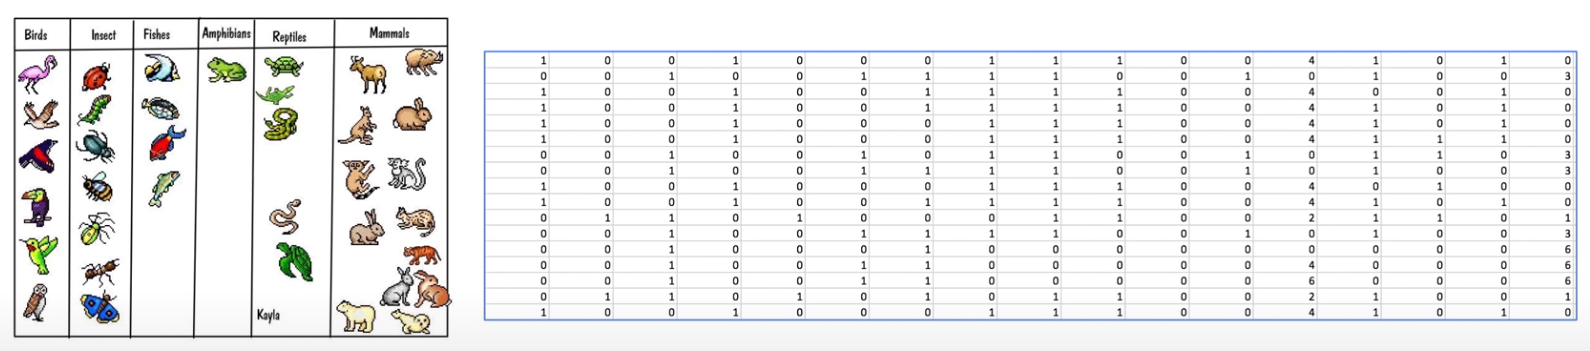

In [14]:
#이미지(animal.png는 깃허브에서 다운받기바랍니다.)
#https://github.com/chohyungrae/Machine-Learning-Deep-Learning-Code-Learning/blob/master/1Lecture/softmax/animal.png
import PIL.Image as pilimg

a = pilimg.open('./animal.png')
a

In [15]:
pip install tensorflow==1.4.0

     |████████████████████████████████| 41.2MB 100kB/s 
     |████████████████████████████████| 1.7MB 45.8MB/s 
     |████████████████████████████████| 890kB 37.0MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=abd172966c6ac23ba3c304f561b42445a0b9acd7c7c9e60f5cc2a972202e5a90
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.5
    Uninstalling bleach-3.1.5:
      Successfully uninstalled bleach-3.1.5
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [16]:
#동물데이터(data-04-zoo.csv는 깃허브에서 다운받기바랍니다.)
#https://github.com/chohyungrae/Machine-Learning-Deep-Learning-Code-Learning/tree/master/1Lecture/softmax

import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
import numpy as np

# 동물 데이터 불러오기
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# Y data가 0 ~ 6으로 7가지
nb_classes = 7

# placeholder
X = tf.placeholder(tf.float32, shape=[None, 16])
Y = tf.placeholder(tf.int32, shape=[None, 1])  # shape = (?, 1)

# Y data를, one-hot으로 변경 : shape = (?, 1, 7)
Y_one_hot = tf.one_hot(Y, nb_classes)

# one_hot을 통과하면 차원이 늘어나므로, reshape로 줄여주기 : shape = (?, 7)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])

W = tf.Variable(tf.random_normal([16, nb_classes]), name="weight")
b = tf.Variable(tf.random_normal([nb_classes]), name="bias")

# Hypothesis : softmax function 사용
# softmax = exp(logits) / reduce_sum(exp(logits))
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# cost/loss function : cross entropy
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)

# Minimize : Gradient Descent 사용
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# argmax() : [0.1, 0.3, 0.5]의 argmax는 1로 가장 큰 값의 index 출력
prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 세션 시작
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: x_data, Y: y_data})
            print(step, sess.run([cost, accuracy], feed_dict={X: x_data, Y: y_data}))
            # 2000 [0.053728174, 1.0]

    # Predict Test
    pred = sess.run(prediction, feed_dict={X: x_data})
    # y_data.flatten() : 다차원 배열을 1차원 배열로 쭉 펴준다.
    # zip : pred와 y_data.flatten() 2개의 배열을 하나로 묶어서 p, y로 넘겨줌
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))
        # [True] Prediction: 6 True Y: 6
        # [True] Prediction: 1 True Y: 1


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

0 [5.3923607, 0.02970297]
100 [0.5702205, 0.7821782]
200 [0.35518533, 0.9108911]
300 [0.25795412, 0.9405941]
400 [0.20153403, 0.9405941]
500 [0.16485088, 0.97029704]
600 [0.13935184, 0.990099]
700 [0.1207813, 1.0]
800 [0.10674539, 1.0]
900 [0.09579998, 1.0]
1000 [0.08703451, 1.0]
1100 [0.07985488, 1.0]
1200 [0.07386089, 1.0]
1300 [0.06877535, 1.0]
1400 [0.06440093, 1.0]
1500 [0.060593806, 1.0]
1600 [0.057246752, 1.0]
1700 [0.054278318, 1.0]
1800 [0.05162544, 1.0]
1900 [0.04923861, 1.0]
2000 [0.047078278, 1.0]
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6